# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

A list of the imports, i.e. libraries used throughout the code

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
DATA_FOLDER = 'Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [4]:
# Write your answer here

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

The first step is to import the required data from each of the ten different files. Since the provided data is in .xls format, a good option is to use the `read_excel` function that pandas provides, for importing Excel spreadsheets. The file names follow a convenient convention that allows for reading in the data in a for loop. 

The `dataset_array` variable is just a regular Python array that stores the imported `DataFrame`s temporarily, until they are merged into a single `DataFrame`.

In [5]:
MICROBIOME_DATA_FOLDER = DATA_FOLDER + '/microbiome'

# Generate the numbers from 1 to 9, which are helpful for creating the file names of the datasets
file_indices = range(1,10)
# A temporary array for storing the DataFrames
dataset_array = [None] * len(file_indices) 
metadata = pd.read_excel(('%s/%s') % (MICROBIOME_DATA_FOLDER, 'metadata.xls'), 'Sheet1', index_col=0, header=0)
for file_index in file_indices:
    file_name = 'MID%d.xls' % file_index # Constructs the name of the file which needs to be imported
    full_path = '%s/%s' % (MICROBIOME_DATA_FOLDER, file_name) # Appends the folder structure to the file name
    dataset_array[file_index - 1] = pd.read_excel(full_path, 'Sheet 1', index_col=0, header=None)
    
dataset_array

[                                                       1
 0                                                       
 Archaea "Crenarchaeota" Thermoprotei Desulfuroc...     7
 Archaea "Crenarchaeota" Thermoprotei Desulfuroc...     2
 Archaea "Crenarchaeota" Thermoprotei Sulfolobal...     3
 Archaea "Crenarchaeota" Thermoprotei Thermoprot...     3
 Archaea "Euryarchaeota" "Methanomicrobia" Metha...     7
 Archaea "Euryarchaeota" "Methanomicrobia" Metha...     1
 Archaea "Euryarchaeota" "Methanomicrobia" Metha...     1
 Archaea "Euryarchaeota" Archaeoglobi Archaeoglo...     1
 Archaea "Euryarchaeota" Archaeoglobi Archaeoglo...     1
 Archaea "Euryarchaeota" Halobacteria Halobacter...     1
 Archaea "Euryarchaeota" Halobacteria Halobacter...     4
 Archaea "Euryarchaeota" Halobacteria Halobacter...     1
 Archaea "Euryarchaeota" Halobacteria Halobacter...     2
 Archaea "Euryarchaeota" Halobacteria Halobacter...     4
 Archaea "Euryarchaeota" Methanococci Methanococ...     1
 Archaea "Eury

Another for loop to go over the imported `DataFrame`s from the different files and append the columns to form a single dataset. This is done by concatenating each DataFrame as an additional column to the `concat_ds` variable, based on the indices which are the taxon names of the archaea and bacteria. An outer join is performed in order to keep the all the rows from both tables, even if there isn't a matching counterpart (there might be one at a later stage, i.e. in another `DataFrame`).

In [6]:
concat_ds = dataset_array[0]
for table in range(1,len(dataset_array)):
    concat_ds = pd.concat([concat_ds, dataset_array[table]], axis=1, join='outer')

concat_ds.head(10)

,1,1,1,1,1,1,1,1,1
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Acidilobaceae Acidilobus",NaN,2.0,1.0,NaN,5.0,NaN,NaN,NaN,NaN
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera",NaN,14.0,15.0,NaN,26.0,NaN,1.0,NaN,1.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7.0,23.0,14.0,2.0,28.0,7.0,8.0,NaN,16.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Stetteria",NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus",NaN,1.0,4.0,NaN,5.0,1.0,2.0,NaN,2.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Thermodiscus",NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Thermosphaera",NaN,2.0,1.0,NaN,2.0,NaN,1.0,NaN,NaN
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Hyperthermus",NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrodictium",NaN,NaN,3.0,NaN,2.0,1.0,1.0,NaN,5.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2.0,2.0,NaN,NaN,3.0,2.0,1.0,NaN,NaN


Each missing value in the dataset should be replaced by the keyword `unknown`.

In [8]:
concat_ds = concat_ds.fillna('unknown')
# concat_ds.index.name = 'Taxon'

concat_ds.head(10)

,1,1,1,1,1,1,1,1,1
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Acidilobaceae Acidilobus",unknown,2,1,unknown,5,unknown,unknown,unknown,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera",unknown,14,15,unknown,26,unknown,1,unknown,1
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7,23,14,2,28,7,8,unknown,16
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Stetteria",unknown,unknown,unknown,unknown,1,unknown,unknown,unknown,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus",unknown,1,4,unknown,5,1,2,unknown,2
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Thermodiscus",unknown,unknown,1,unknown,unknown,unknown,unknown,unknown,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Thermosphaera",unknown,2,1,unknown,2,unknown,1,unknown,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Hyperthermus",unknown,1,unknown,unknown,unknown,unknown,unknown,unknown,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrodictium",unknown,unknown,3,unknown,2,1,1,unknown,5
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2,2,unknown,unknown,3,2,1,unknown,unknown


Next would be to append the metadata to the `DataFrame` as column titles. Since the metadata consists of three pieces of information for each file (which corresponds to one column), there will be three levels of hierarchy in the column indexing.

The first level index is `Sample`, whether the sample is taken from a tissue or from the stool. This allows for a nice grouping of the data since there are only three possible values for this attribute.

The second column index level is `Group`, which indicates whether the sample has been taken from a healthy tissue (control) or not.

The third index level is the `Barcode` that actually corresponds to the file names from where the data was imported.

In [22]:
level1 = list(metadata.iloc[:,1].fillna('unknown'))
level2 = list(metadata.iloc[:,0])
level3 = list(metadata.index)

metadata_columns = list(metadata.columns)
column_indices = pd.MultiIndex.from_arrays([level1, level2, level3], 
                                           names=[metadata_columns[1], metadata_columns[0], metadata.index.name])
concat_ds.columns = column_indices
concat_ds.head(10)

SAMPLE                                                        unknown  \
GROUP                                              EXTRACTION CONTROL   
BARCODE                                                          MID1   
Archaea "Crenarchaeota" Thermoprotei Acidilobal...            unknown   
Archaea "Crenarchaeota" Thermoprotei Acidilobal...            unknown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...                  7   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...            unknown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...            unknown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...            unknown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...            unknown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...            unknown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...            unknown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...                  2   

SAMPLE                                               tissue            \
GROUP                                                 NEC 1 Control 1   
BARCODE                                                MID2      MID3   
Archaea "Crenarchaeota" Thermoprotei Acidilobal...        2         1   
Archaea "Crenarchaeota" Thermoprotei Acidilobal...       14        15   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...       23        14   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  unknown   unknown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...        1         4   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  unknown         1   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...        2         1   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...        1   unknown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  unknown         3   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...        2   unknown   

SAMPLE                                                                 \
GROUP                                                 NEC 2 Control 2   
BARCODE                                                MID4      MID5   
Archaea "Crenarchaeota" Thermoprotei Acidilobal...  unknown         5   
Archaea "Crenarchaeota" Thermoprotei Acidilobal...  unknown        26   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...        2        28   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  unknown         1   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  unknown         5   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  unknown   unknown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  unknown         2   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  unknown   unknown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  unknown         2   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  unknown         3   

SAMPLE                                                stool            \
GROUP                                                 NEC 1 Control 1   
BARCODE                                                MID6      MID7   
Archaea "Crenarchaeota" Thermoprotei Acidilobal...  unknown   unknown   
Archaea "Crenarchaeota" Thermoprotei Acidilobal...  unknown         1   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...        7         8   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  unknown   unknown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...        1         2   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  unknown   unknown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  unknown         1   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  unknown   unknown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...        1         1   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...        2         1   

SAMPLE                                                                 
GROUP                                                 NEC 2 Control 2  
BARCODE                                                M

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [41]:
from IPython.core.display import HTML
HTML(filename="Data"+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [42]:
data=pd.read_excel('Data/titanic.xls')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [43]:
data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

There are a total of 14 attributes:
1. Name
    * object (string)
2. Ticket
    * object (string)
3. Pclass
    * integer, *should be categorical (ordinal)*
    * 1st, 2nd, 3rd class
4. Survived
    * integer, *should be categorical (nominal)*
    * 0=No, 1=Yes
5. Sex
    * object (string) *should be categorical (nominal)*
    * female, male
6. Age
    * float, *discretization might be usefull*
    * [0.166700, 80]
    * has 263 missing values
7. Sibsp
    * int
    * [0,8]
8. Parch
    * int
    * [0, 9]
9. Fare
    * float
    * [0, 512.329200]
    * has 1 missing values
10. Cabin
    * object (string), *spliting on two attributes deck (categorical,ordinal) and room number (numeric) might be usfull)*
    * has 1014 missing values
11. Embarked
    * object (string), *should be categorical (nominal)*
    * S, C, Q
    * has 2 missing values
12. Boat
    * object (string)
    * [1, 16], [A-D]
    * has 823 missing values
13. Body
    * float, *should be int since it has only integer values*
    * [1, 328]
    * has 1118 missing values
14. Home.dest
    * object (string)
    * has 564 missing values

Since we've discussed the range of the attributes and determined the categorical ones, now we will focus on their ordering.

The attribute `pclass` is ordered, since being in a higher class has more benefits than being in a lower one. The other three categorical attributes are not inherently ordered, hence they will be unordered (nominal).

In [44]:
data['pclass'] = pd.Categorical(data['pclass'], categories=[1,2,3], ordered=True)
data['sex'] = pd.Categorical(data['sex'], categories=['male', 'female'], ordered=False)
data['survived'] = pd.Categorical(data['survived'], categories=[0, 1], ordered=False)
data['embarked'] = pd.Categorical(data['embarked'], categories=['C', 'Q', 'S'], ordered=False)

In all of the cases we use the countplot function for the plotting. 

Here everything is more or less straight-forward, except for age. We use categories that span from 0 to 80, since the oldest passenger's age is 80 years. This way the entire attribute range is covered and having more groups would only result in uninformative empty sets.

I should mention that as we saw above, there are missing values in the embarkation port and the age. In the former  there are only two missing values and even though they can be easily predicted using some of the others attributes, they are a tiny fraction and can be excluded from the counting. Age on the other case is missing 263 values, which is a significant fraction. In order to make the most of the information at hand (age can be a significant factor of the survival rate), we could use different prediction techniques to either get the precise age of the individual or just his age category, but as discussed in the exercise session we will just exclude them for the task at hand.

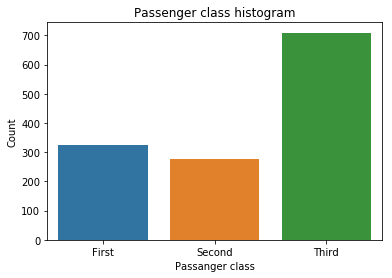

In [45]:
# Class
fig, ax = plt.subplots()
sns.countplot(x='pclass', data=data)
plt.xlim(-0.5,2.5)
plt.xlabel('Passanger class')
plt.ylabel('Count')
plt.title('Passenger class histogram')
ax.set_xticks([0,1,2])
ax.set_xticklabels(['First', 'Second', 'Third'])
plt.show()

The most numerous group of passengers travelled on the Titanic in the third class.

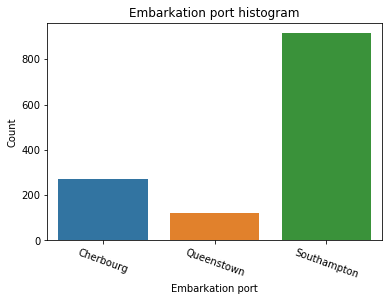

In [46]:
# Embarkation port
fig, ax = plt.subplots()
sns.countplot(x='embarked', data=data)
plt.xlim(-0.5,2.5)
plt.xlabel('Embarkation port')
plt.ylabel('Count')
plt.title('Embarkation port histogram')
ax.set_xticks([0,1,2])
ax.set_xticklabels(['Cherbourg', 'Queenstown', 'Southampton'])
plt.xticks(rotation=-20)
plt.show()

The vast majority of passengers boarded in the Southampton port.

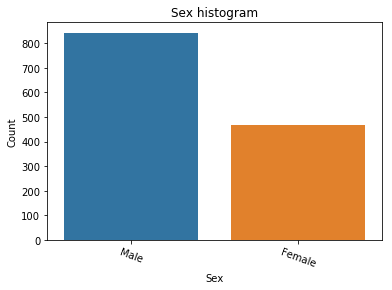

In [47]:
# Sex
fig, ax = plt.subplots()
sns.countplot(x='sex', data=data)
plt.xlim(-0.5,1.5)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Sex histogram')
ax.set_xticks([0,1])
ax.set_xticklabels(['Male', 'Female'])
plt.xticks(rotation=-20)
plt.show()

The gender distribution on the ship suggests that the number of males dominated over the number of females. 

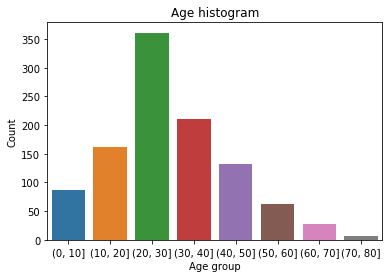

In [48]:
# Age
data['age'] = pd.cut(data['age'], [0,10,20,30,40,50,60,70,80])
fig, ax = plt.subplots()
sns.countplot(x='age', data=data)
plt.xlabel('Age group')
plt.ylabel('Count')
plt.title('Age histogram')
plt.show()

According to the age, the largest fraction of the passenger population falls in the age range between 10 and 40, with the predominant group being the one with people in the third decade of life.

After analysing the Titanic architecture plans, it has been noticed that there were a total of 9 decks on the ship out of which 8 have cabins on them and all of populated cabin fields in our data contain valid deck "symbols". 

For the third task we assume that all of the available data is correct, even though at some places there are only deck symbols while the room numbers are missing. It should be noticed that some passengers have more cabins under their name and in those cases we suppose that they have reserved more cabins for them or their family neighbours. 

With these assumtions we proceed as follows.

In [49]:
# Create a table with a column for every cabin that a passenger has on his name 
# (no more than 4 rooms are reserved by one passanger in our dataset)
c1 = data['cabin'].apply(lambda s: s.split(' ')[0] if not type(s) == float else None)
c2 = data['cabin'].apply(lambda s: s.split(' ')[1] if not type(s) == float and len(s.split(' ')) > 1 else None)
c3 = data['cabin'].apply(lambda s: s.split(' ')[2] if not type(s) == float and len(s.split(' ')) > 2 else None)
c4 = data['cabin'].apply(lambda s: s.split(' ')[3] if not type(s) == float and len(s.split(' ')) > 3 else None)
temp = data.join(pd.concat({'c1': c1, 'c2': c2, 'c3': c3, 'c4': c4}, axis=1))
temp.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,c1,c2,c3,c4
0,1,1,"Allen, Miss. Elisabeth Walton",female,"(20, 30]",0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",B5,None,None,None
1,1,1,"Allison, Master. Hudson Trevor",male,"(0, 10]",1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",C22,C26,None,None
2,1,0,"Allison, Miss. Helen Loraine",female,"(0, 10]",1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",C22,C26,None,None
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,"(20, 30]",1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",C22,C26,None,None
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,"(20, 30]",1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",C22,C26,None,None


In [50]:
# We melt the different cabin columns into one and we add another column c# (cabin number) indicating the number of the reservation by user
# In the melting we use name and ticket as identity columns since none of them is unique by inself (i.e there are passengers with same name, and passengers with same ticket number, but not both)
# We also split the cabin on deck column (which we categorize, and a roomNo)
cabinData = pd.melt(temp[['name', 'ticket', 'c1', 'c2', 'c3', 'c4']], id_vars=['name', 'ticket'], var_name='c#', value_name='cabin')
cabinData = cabinData.join(cabinData['cabin'].str.extract('(?P<deck>[A-Z])(?P<roomNo>\d*$)', expand=True))
cabinData['deck'] = pd.Categorical(cabinData['deck'], categories=['T', 'A', 'B', 'C', 'D', 'E', 'F', 'G'], ordered=True)
cabinData.head()

,name,ticket,c#,cabin,deck,roomNo
0,"Allen, Miss. Elisabeth Walton",24160,c1,B5,B,5
1,"Allison, Master. Hudson Trevor",113781,c1,C22,C,22
2,"Allison, Miss. Helen Loraine",113781,c1,C22,C,22
3,"Allison, Mr. Hudson Joshua Creighton",113781,c1,C22,C,22
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",113781,c1,C22,C,22


In [52]:
# Now we are interested only in the reservations that have different decks
# i.e if a passenger X has reserved two cabins C 1 and C 2 we only count him once as him being in deck C
# also it should be noted that there are a few passenger with reservations in two different decks ex. F and E and we count them twice on both decks, since we don't know in which of the two rooms they were staying
df = cabinData[~cabinData.deck.isnull()]
print("Number of cabin reservations: %d" % df.shape[0])
print("Number of cabin reservations missing a room number: %d" % cabinData[cabinData.roomNo == ''].shape[0])
df = df[['name', 'ticket', 'deck']].drop_duplicates()
print("Number of cabin reservations on different decks by passengers: %d" % df.shape[0])
df.head()

Number of cabin reservations: 356
Number of cabin reservations missing a room number: 13
Number of cabin reservations on different decks by passengers: 302


,name,ticket,deck
0,"Allen, Miss. Elisabeth Walton",24160,B
1,"Allison, Master. Hudson Trevor",113781,C
2,"Allison, Miss. Helen Loraine",113781,C
3,"Allison, Mr. Hudson Joshua Creighton",113781,C
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",113781,C


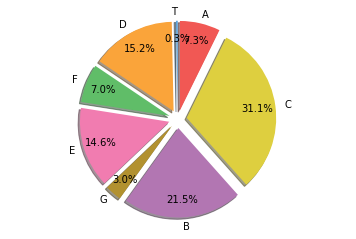

In [53]:
counts = df.deck.value_counts()
counts = counts[[7, 2, 5, 3, 6, 1, 0, 4]] # we just permute the order of the pie pieces, to make visually more distinguishable (make smallest pieces far from each other)
labels = list(counts.keys())
sizes = counts.values
explode = (0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, explode=explode, pctdistance=0.8, startangle=90, colors=["#5DA5DA", "#FAA43A", "#60BD68", "#F17CB0", "#B2912F", "#B276B2", "#DECF3F", "#F15854" ])
ax1.axis('equal')
plt.title("")
plt.show()

In [149]:
survived_grouped = data[data.survived == 1].groupby(['pclass', 'sex'], as_index=False).count()[['pclass', 'sex', 'survived']]
total_grouped = data.groupby(['pclass', 'sex'], as_index=False).count()[['pclass', 'sex', 'survived']]
survived_grouped['survived_proportion'] = survived_grouped['survived'] / total_grouped['survived']

survived_grouped

,pclass,sex,survived,survived_proportion
0,1,male,61,0.340782
1,1,female,139,0.965278
2,2,male,25,0.146199
3,2,female,94,0.886792
4,3,male,75,0.152130
5,3,female,106,0.490741


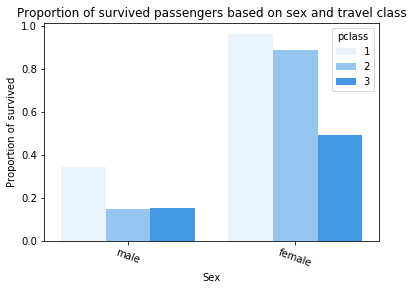

In [156]:
fig, ax = plt.subplots()
sns.barplot(x="sex", y="survived_proportion", hue="pclass", data=survived_grouped, color="#2A98FD")
plt.xlabel('Sex')
plt.ylabel('Proportion of survived')
plt.title('Proportion of survived passengers based on sex and travel class')
plt.xticks(rotation=-20)
plt.show()